In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


# Data Exploration

In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')

In [3]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
cols_with_missing = [col for col in data.columns if data[col].isnull().sum()>0]
print(cols_with_missing)

[]


In [6]:
data.shape

(270, 14)

In [7]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Data Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

In [9]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [10]:
encoded_cat_features = data[[col for col in data.columns if data[col].nunique()<=3 and col!='Heart Disease']]
discrete_features = data[[col for col in data.columns if col not in encoded_cat_features and col not in ['ST depression','Heart Disease']]]
contd_features = data[['ST depression']]

In [11]:
print("Encoded Categorical Features: ", encoded_cat_features)
print("Discrete Features: ", discrete_features)
print("Continuous Features: ", contd_features)

Encoded Categorical Features:       Sex  FBS over 120  EKG results  Exercise angina  Slope of ST  Thallium
0      1             0            2                0            2         3
1      0             0            2                0            2         7
2      1             0            0                0            1         7
3      1             0            0                1            2         7
4      0             0            2                1            1         3
..   ...           ...          ...              ...          ...       ...
265    1             1            0                0            1         7
266    1             0            0                0            1         7
267    0             0            2                0            2         3
268    1             0            0                0            2         6
269    1             0            2                1            2         3

[270 rows x 6 columns]
Discrete Features:       Age  Che

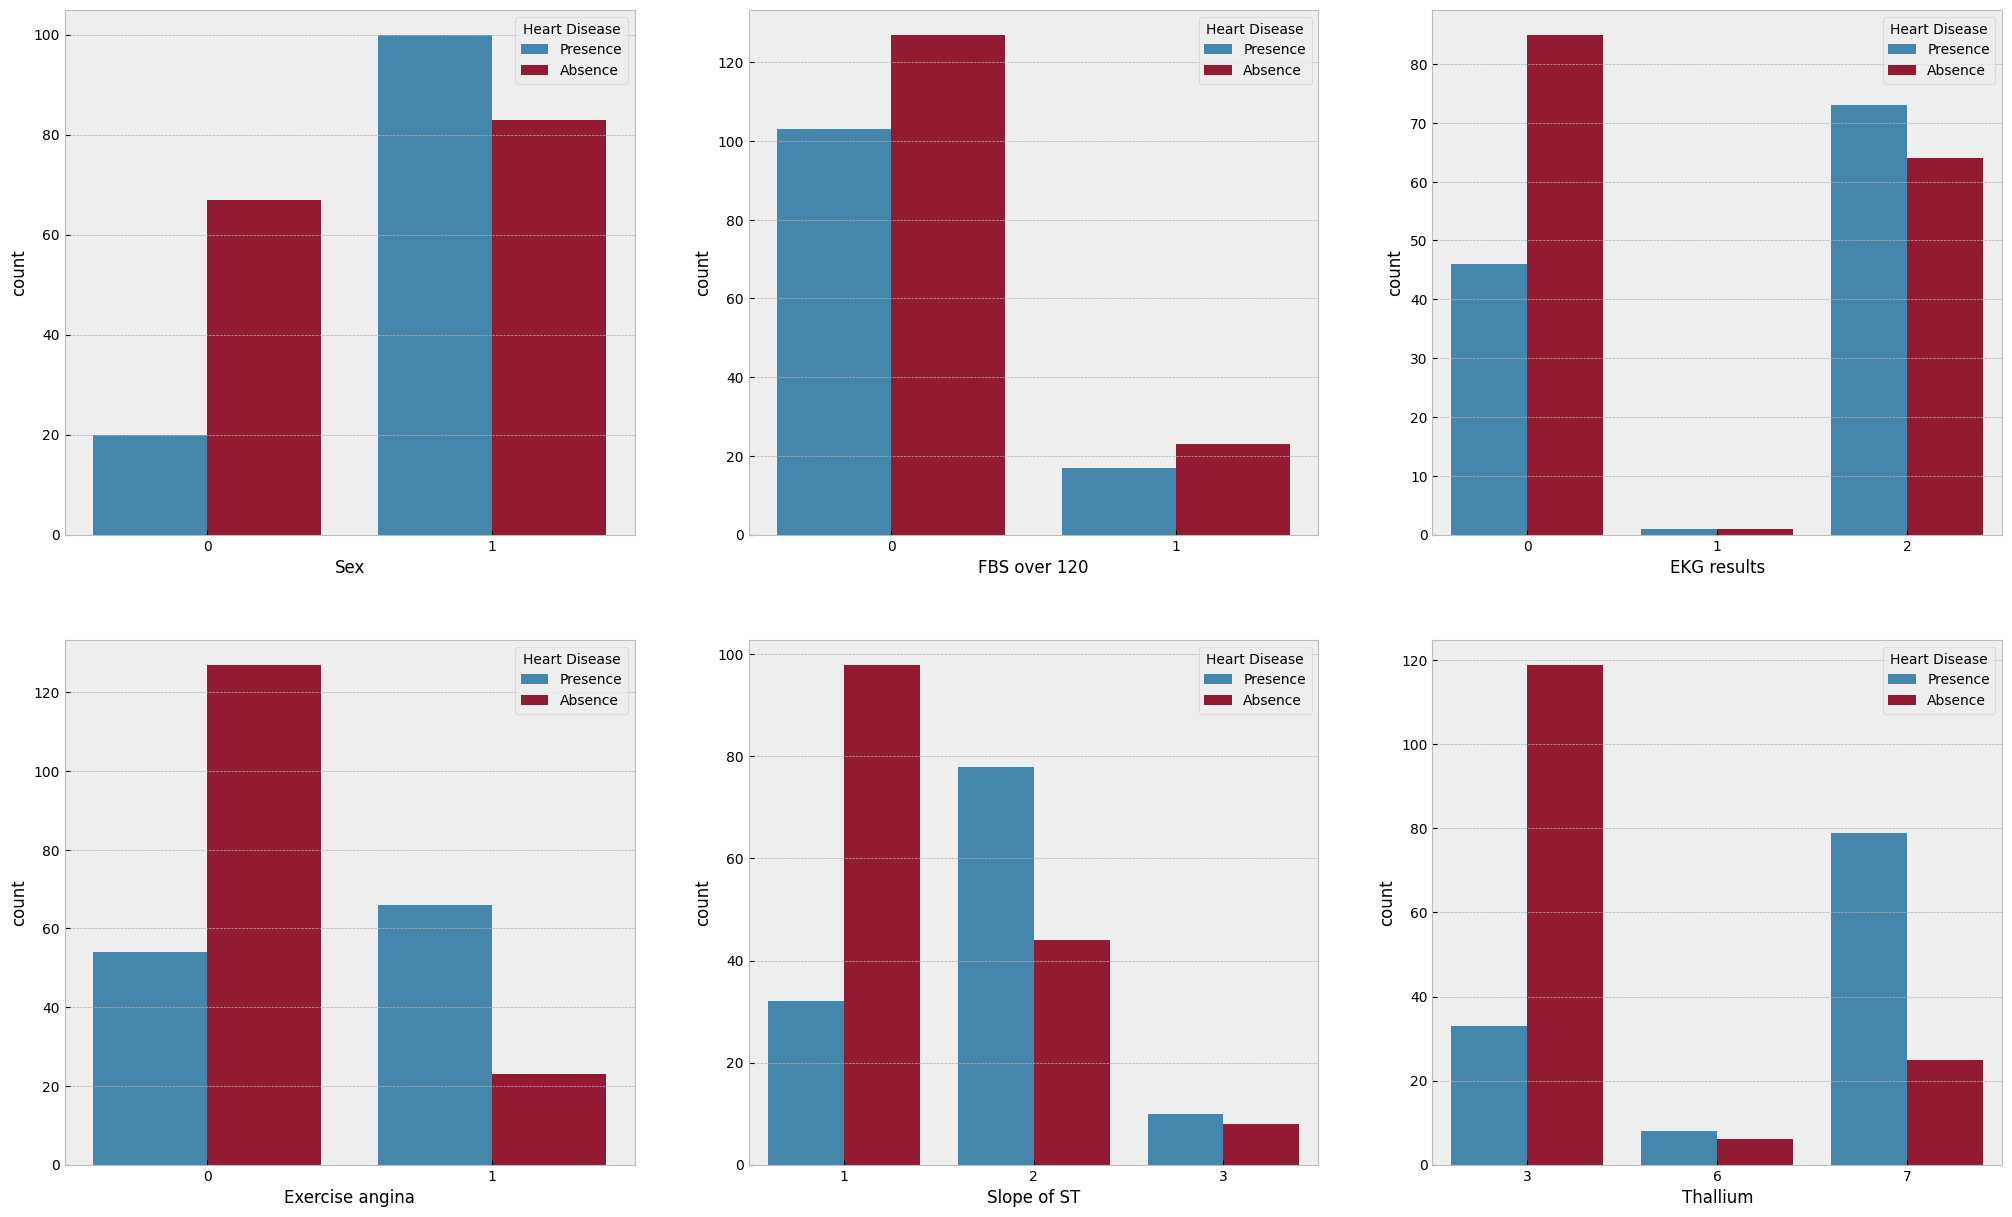

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))
for i, subplots in zip(encoded_cat_features, ax.flatten()):
    sns.countplot(x = encoded_cat_features[i], hue = data['Heart Disease'], ax = subplots)
plt.show()


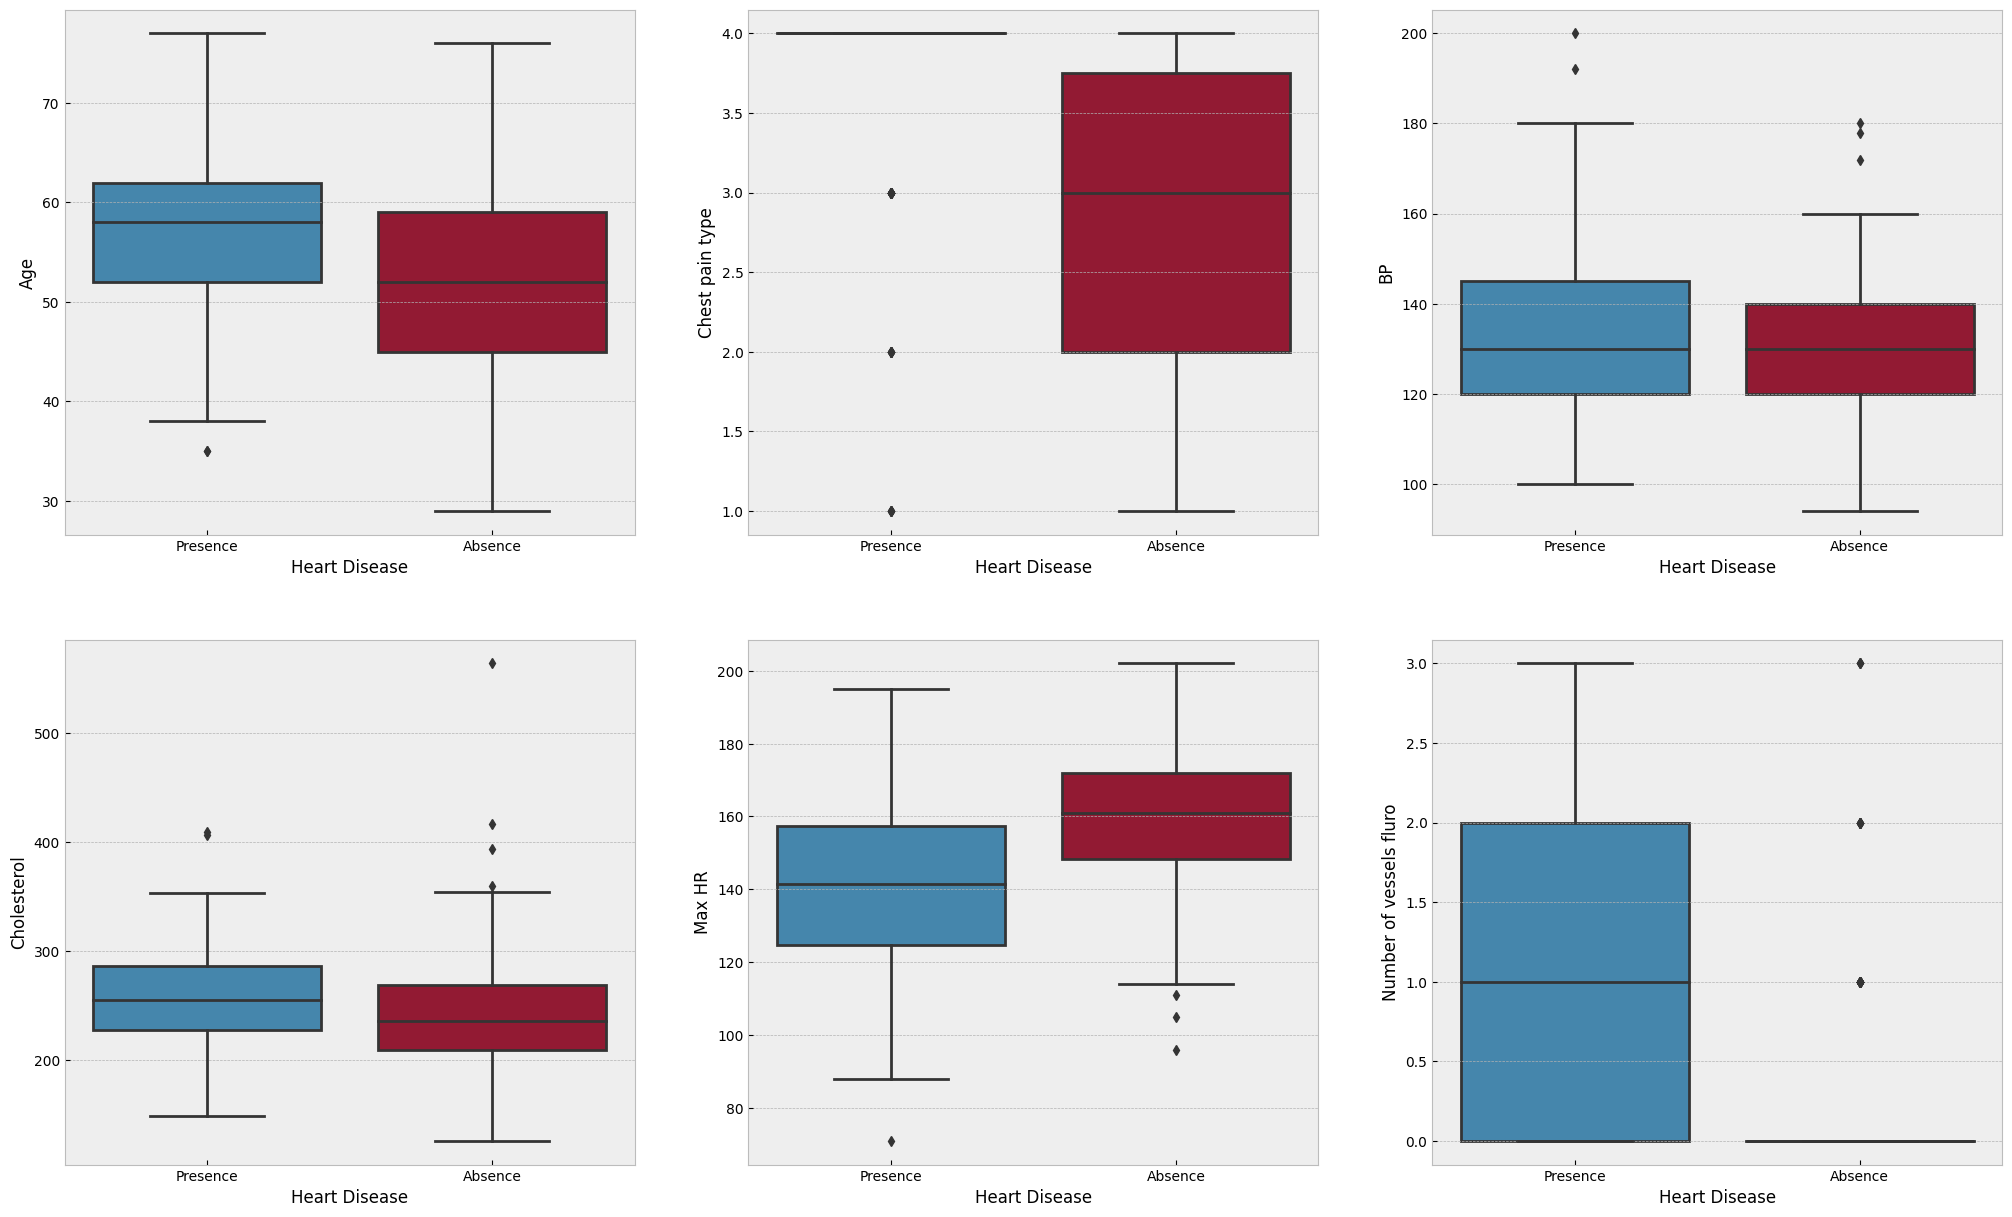

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))
for i, subplots in zip(discrete_features, ax.flatten()):
    sns.boxplot(x = data['Heart Disease'], y = discrete_features[i], ax = subplots)
plt.show()


In [14]:
import warnings
warnings.filterwarnings('ignore')

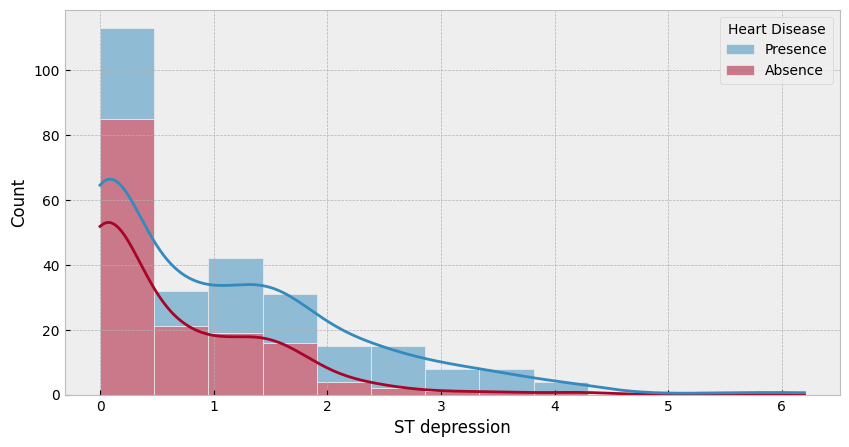

In [15]:
plt.figure(figsize = (10,5))
sns.histplot(data = data, x = 'ST depression', hue = 'Heart Disease', kde = True, multiple = 'stack')
plt.show()

# Train test split and Feature selection

In [16]:
from sklearn.model_selection import train_test_split

df = data.copy()
X = df.drop('Heart Disease', axis = 1)
y = df.pop('Heart Disease')

In [17]:
X.shape, y.shape

((270, 13), (270,))

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((216, 13), (54, 13), (216,), (54,))

In [20]:
X_train.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
dtype: object

In [21]:
disf_temp = X_train.select_dtypes(include = ['int64'])

In [22]:
discrete_features_indices = [X_train.columns.get_loc(col) for col in disf_temp if col in X_train.columns]

In [23]:
discrete_features_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]

In [24]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    result = mutual_info_classif(X_train, y_train, discrete_features=discrete_features_indices)
    result = pd.Series(result, name="MI Scores", index=X_train.columns)
    result = result.sort_values(ascending=False)
    return result

In [25]:
miscores = make_mi_scores(X_train, y_train, discrete_features)
miscores

Cholesterol                0.454501
Max HR                     0.249229
Chest pain type            0.151677
Thallium                   0.147921
Age                        0.137616
BP                         0.123930
Number of vessels fluro    0.113429
Exercise angina            0.105134
ST depression              0.102201
Slope of ST                0.089309
Sex                        0.040627
EKG results                0.006692
FBS over 120               0.000623
Name: MI Scores, dtype: float64

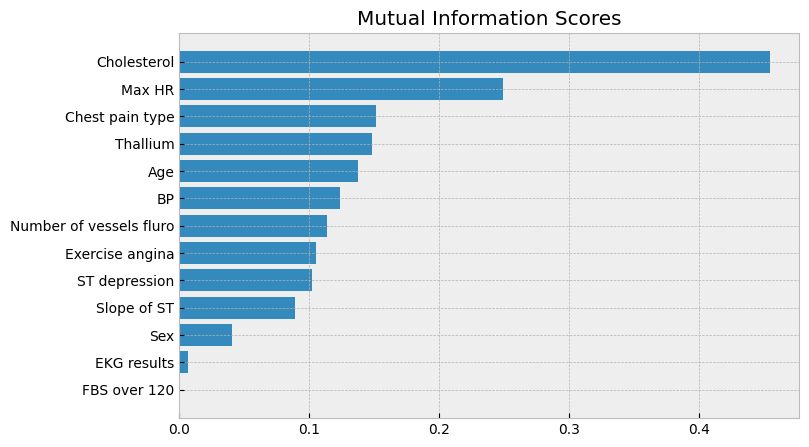

In [26]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(miscores)

In [27]:
selected_features = miscores[miscores > 0.12].index
selected_features

Index(['Cholesterol', 'Max HR', 'Chest pain type', 'Thallium', 'Age', 'BP'], dtype='object')

# Model training

In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_valid)


# Model accuracy evaluation

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9074074074074074


In [30]:
from sklearn.metrics import classification_report

class_report = classification_report(y_valid, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

     Absence       0.89      0.97      0.93        33
    Presence       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

